
## Project Code     : PRCP -1016
## Project Name    : Heart Disease Prediction 

### Business case

    The objective of the project is to create a reliable model predicting potential Heart Diseases in people


#### Problem:

Heart disease is the leading cause of death globally,costing healthcare systems billions each year.

* Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.

* Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000
happen in people who have already had a heart attack.

* Heart disease is the leading cause of death for people of most ethnicities in the United States,
including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians
or Pacific Islanders, heart disease is second only to cancer.

    Early detection and intervention are crucial for preventing serious complications and reducing mortality (death). 
However, traditional risk assessment methods often lack accuracy and personalization, leading to missed diagnoses
and unnecessary interventions.

#### Solution:
    This project proposes developing a heart disease prediction model using machine learning (ML) algorithms.
    It will involve:

Task 1: Data Analysis Report: Comprehensive analysis of patient data to identify risk factors and relationships 
        between variables.
        
Task 2: Machine Learning Model: Building and training an ML model to predict potential heart disease in individuals 
        based on various factors.
        
Task 3: Hospital Actionable Suggestions: Recommending strategies to integrate model predictions into hospital workflows
        for targeted screening, personalized prevention, and improved patient outcomes.
        
##### Benefits:

Improved Accuracy: ML models can learn complex patterns in data, potentially surpassing traditional methods 
    in predicting heart disease with greater accuracy.
    
Early Detection: Identifying individuals at high risk early allows for timely intervention and preventive measures,
    reducing complications and mortality (death).
    
Personalized Care: The model can tailor recommendations based on individual risk factors, leading to more effective
    and efficient interventions.
    
Cost Reduction: Early detection and prevention can significantly reduce healthcare costs associated with treating
advanced heart disease stages.

Enhanced Patient Engagement: Empowering patients to understand their risk profile and actively participate in preventive
    measures.

### Domain Analysis


There are two datasets to be utilized in this project; values and labels.  The values dataset consists of 14 columns while that of label contains 2 columns.
Both dataset have the patient_id column with the same values as a unique and random identifier. Both data sets will be merged as one.
The presence of heart disease column is the label .it contains 2 values(datatype: binary).

The remaining 13 features are described in the section below.

* slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* resting_blood_pressure (type: int): resting blood pressure
* chest_pain_type (type: int): chest pain type (4 values)
* num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
* fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
* resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
* serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
* oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* sex (type: binary): 0: female, 1: male
* age (type: int): age in years
* max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
* exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)
 

#### Heart Disease Prediction:

In heart disease prediction, exercise-induced angina holds significant weight as:

Symptom of underlying heart disease: Its presence strongly suggests potential coronary artery disease (CAD), the leading cause of heart attacks.
Non-invasive indicator: Unlike invasive tests like angiography, exercise stress tests can safely screen and identify individuals at risk for heart disease by revealing angina.
Severity marker: The severity and duration of angina during exercise provide clues to the extent of potential heart damage and disease progression.
However, it's important to remember:

Not everyone with angina has heart disease: Other factors like musculoskeletal issues or anxiety can also trigger chest pain during exercise.
Some people with heart disease may not experience angina: The degree of disease severity and individual variations in symptoms are at play.
Therefore, exercise-induced angina is a crucial symptom to consider in heart disease prediction, but it should be interpreted along with other clinical factors, risk assessments, and diagnostic tests for a comprehensive evaluation.



In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1 -Prepare a complete data analysis report on the given data

In [2]:
## Load the data
df1=pd.read_csv('values.csv')
df2= pd.read_csv('labels.csv')

### BASIC CHECKS

In [3]:
df1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
df2.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
df1.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [6]:
df2.tail()

,patient_id,heart_disease_present
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0
179,2nx10r,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   patient_id             180 non-null    object
 1   heart_disease_present  180 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [9]:
df1.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [10]:
df2.describe()

,heart_disease_present
count,180.000000
mean,0.444444
std,0.498290
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
data=pd.merge(df1,df2,on='patient_id',how='right')

In [12]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [13]:
data.sex.value_counts()

1    124
0     56
Name: sex, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [14]:
import sweetviz as sv    # library for univariant analysis

my_report = sv.analyze(data)   ## pass the original dataframe

my_report.show_html()   # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


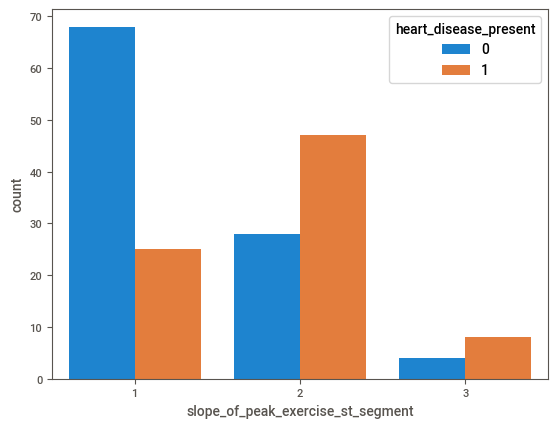

In [15]:
#Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how slope_of_peak_exercise_st_segment impact heart_disease_present.
sns.countplot(x='slope_of_peak_exercise_st_segment',hue='heart_disease_present',data=data)
plt.show()

In [16]:
#bivariate analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [17]:
#creating 2 dataframes from data2,1. categorical data,2 for numerical data
data1=pd.DataFrame(data,columns= ['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina'])
data2=pd.DataFrame(data,columns= ['resting_blood_pressure','serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age','max_heart_rate_achieved'])

In [18]:
data1.head()

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina
0,1,normal,2,0,0,2,1,0
1,2,normal,3,0,0,0,0,0
2,1,normal,4,3,0,2,1,1
3,1,reversible_defect,4,0,0,0,1,0
4,3,reversible_defect,1,0,0,2,1,0


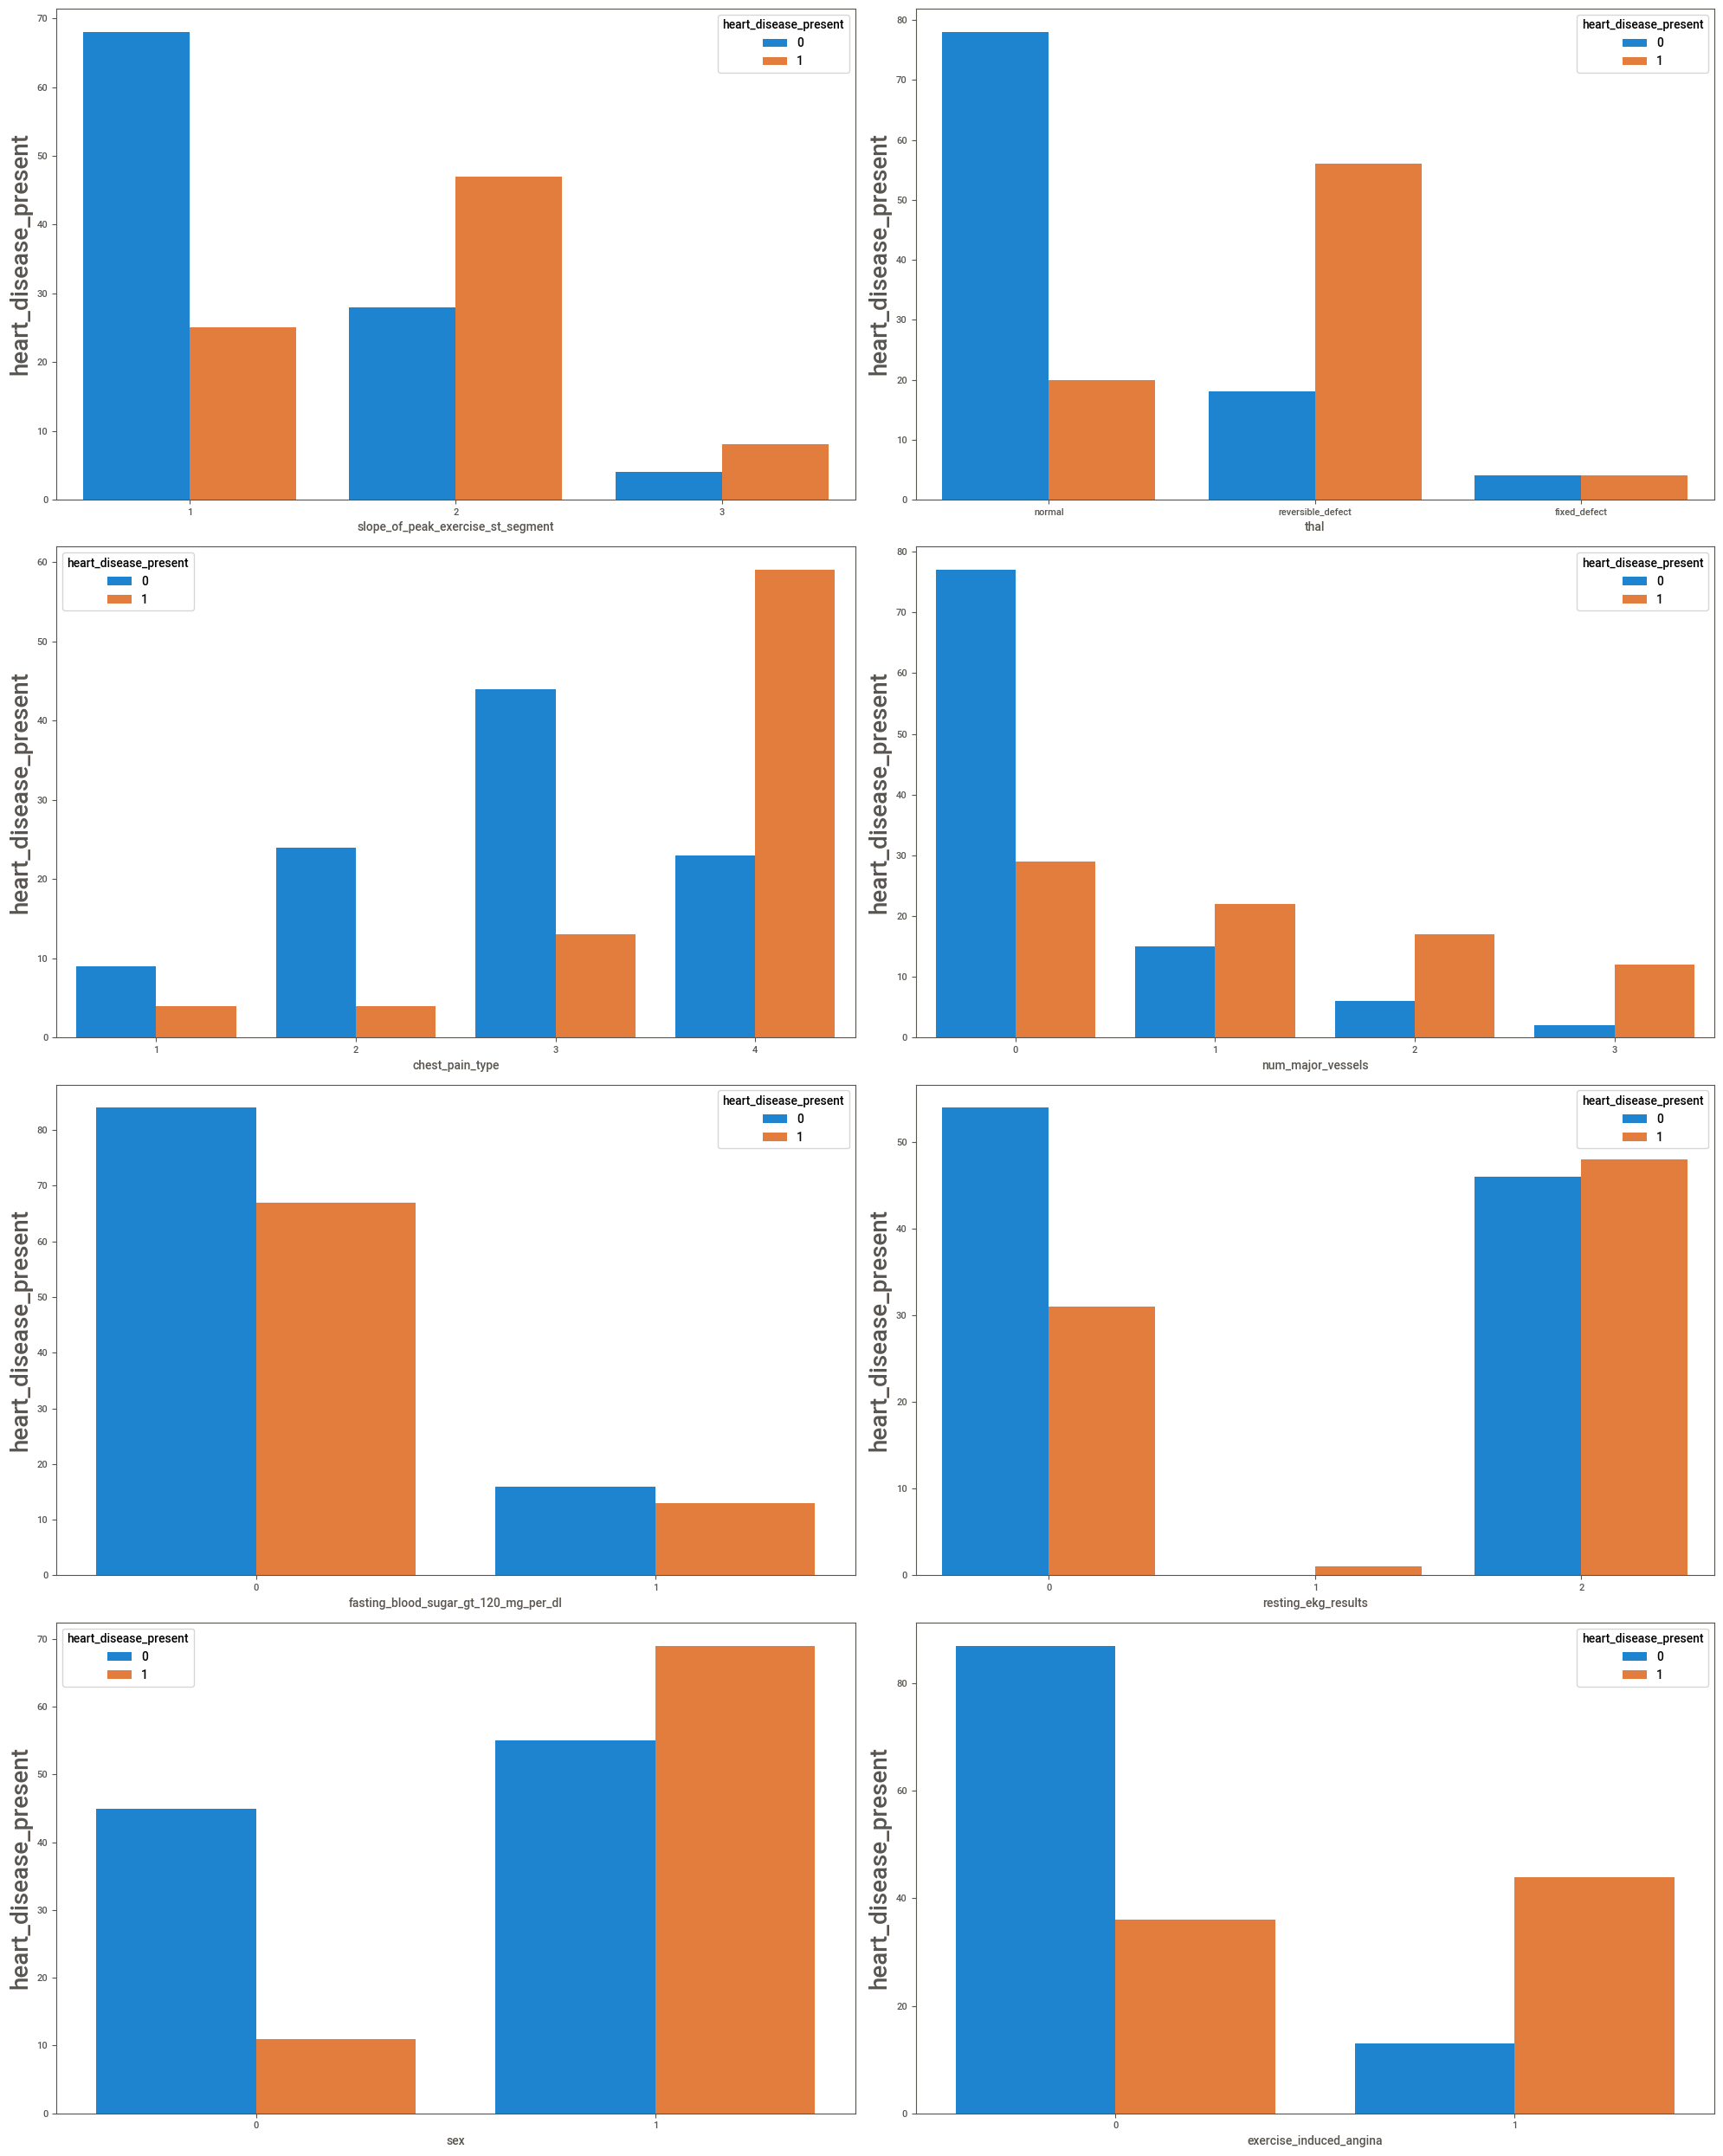

In [19]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=8 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(x=data1[column],hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=10)#assign name to x-axis and set font-20
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

Insights from data:
* People with 1  slope of peak exercise segment will most likely not have a heart disease

* People with reversible defect for thal will most likely have a heart disease

* As the chest pain type increases so does the likelihood for a person to have heart disease increases. 

* A person with 4 chest pain type will most likely have a heart disease.

* As number of major vessel increase , so does the presence of heart disease decrease. A person with major vessel will mostly not have a heart disease

* Males will most like have heart disease compared to females.

* People with fasting blood sugar of less than 120mg are likely to have a heart disease compared with those who have
* greater than 120mg/dl blood sugar

* people with 2 resting ekg result will most likely have a heart disease present

* people without exercise induced angina will mostly likely not have a heart disease compared with people who have it.




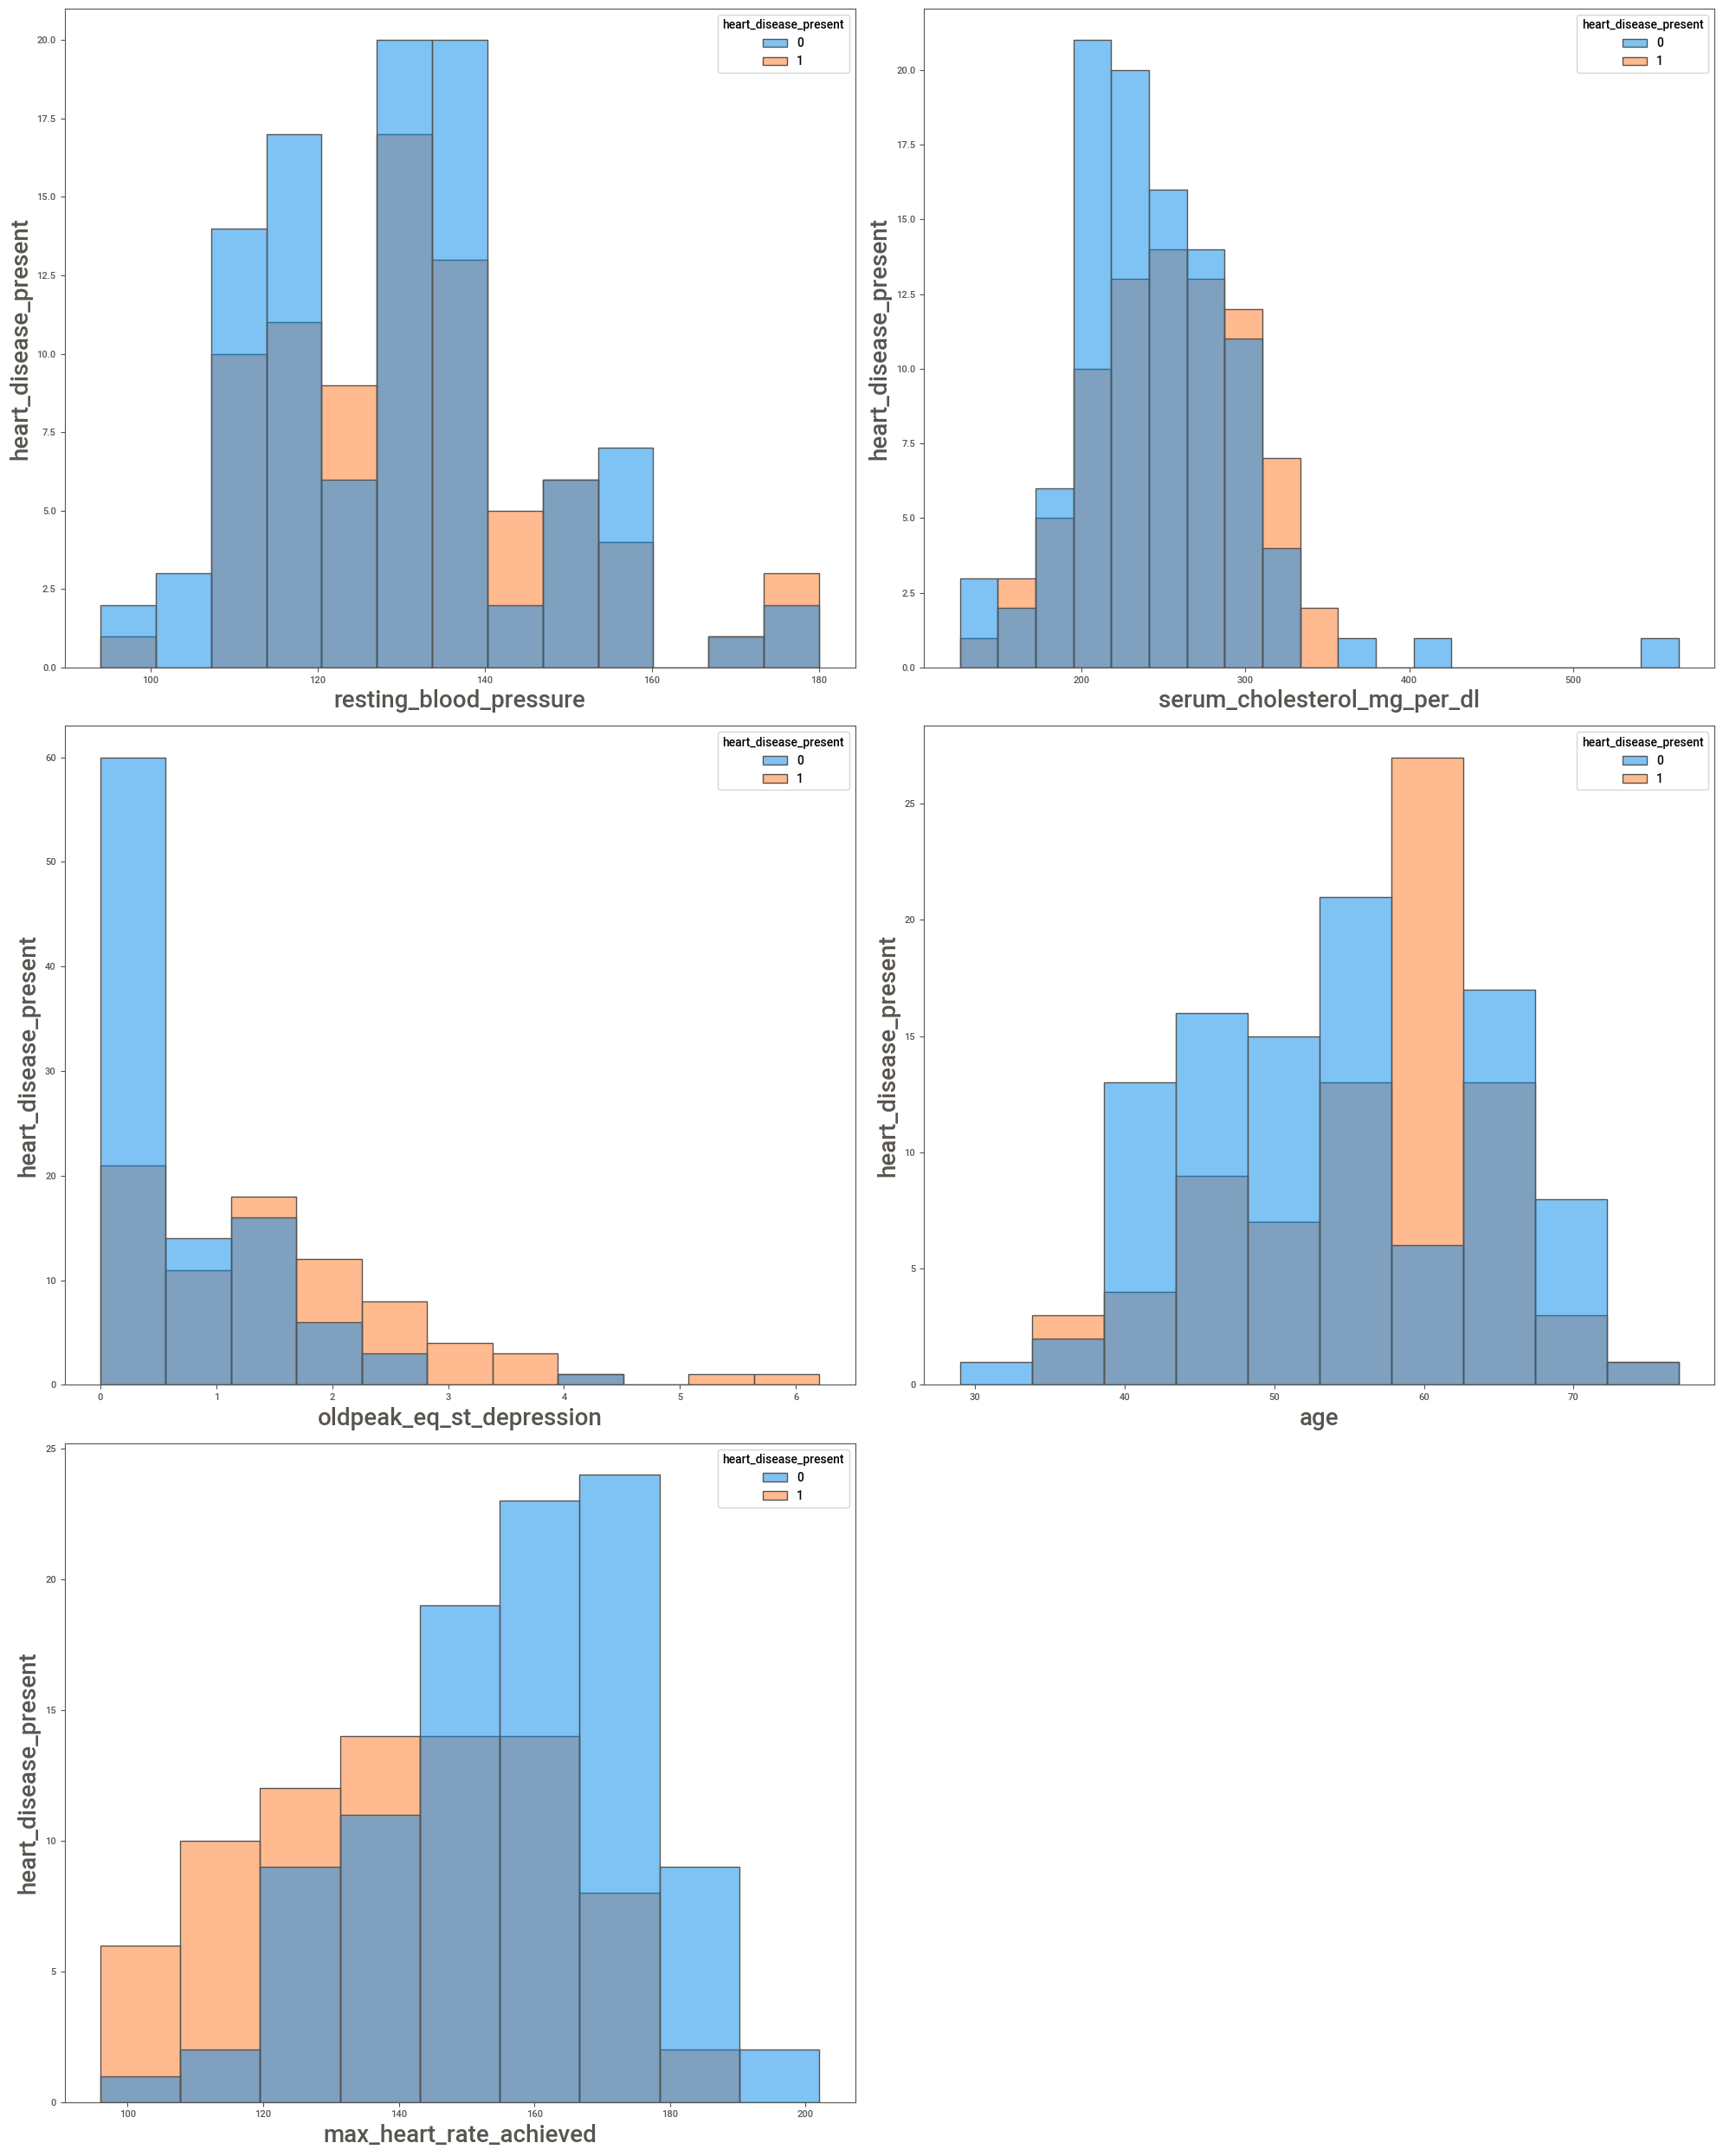

In [20]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data2:#accessing the columns 
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(x=data2[column],hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

* People between the ages of 60-64 years are most likely to have a heart disease.
* As maximun heart rate increase so does the presence of heart disease decrease.people with heart rate with 100 and 140
 will most likely have a heart disease.

### DATA PRE PROCESSING AND FEATURE ENGINEEERING

In [21]:
#Step 1 Handling the missing values
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [23]:
data['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

#### convert the categorical data into numerical (thal column)

In [24]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['thal']= label_encoder.fit_transform(data['thal']) 
  
data['thal'].unique()

array([1, 2, 0])

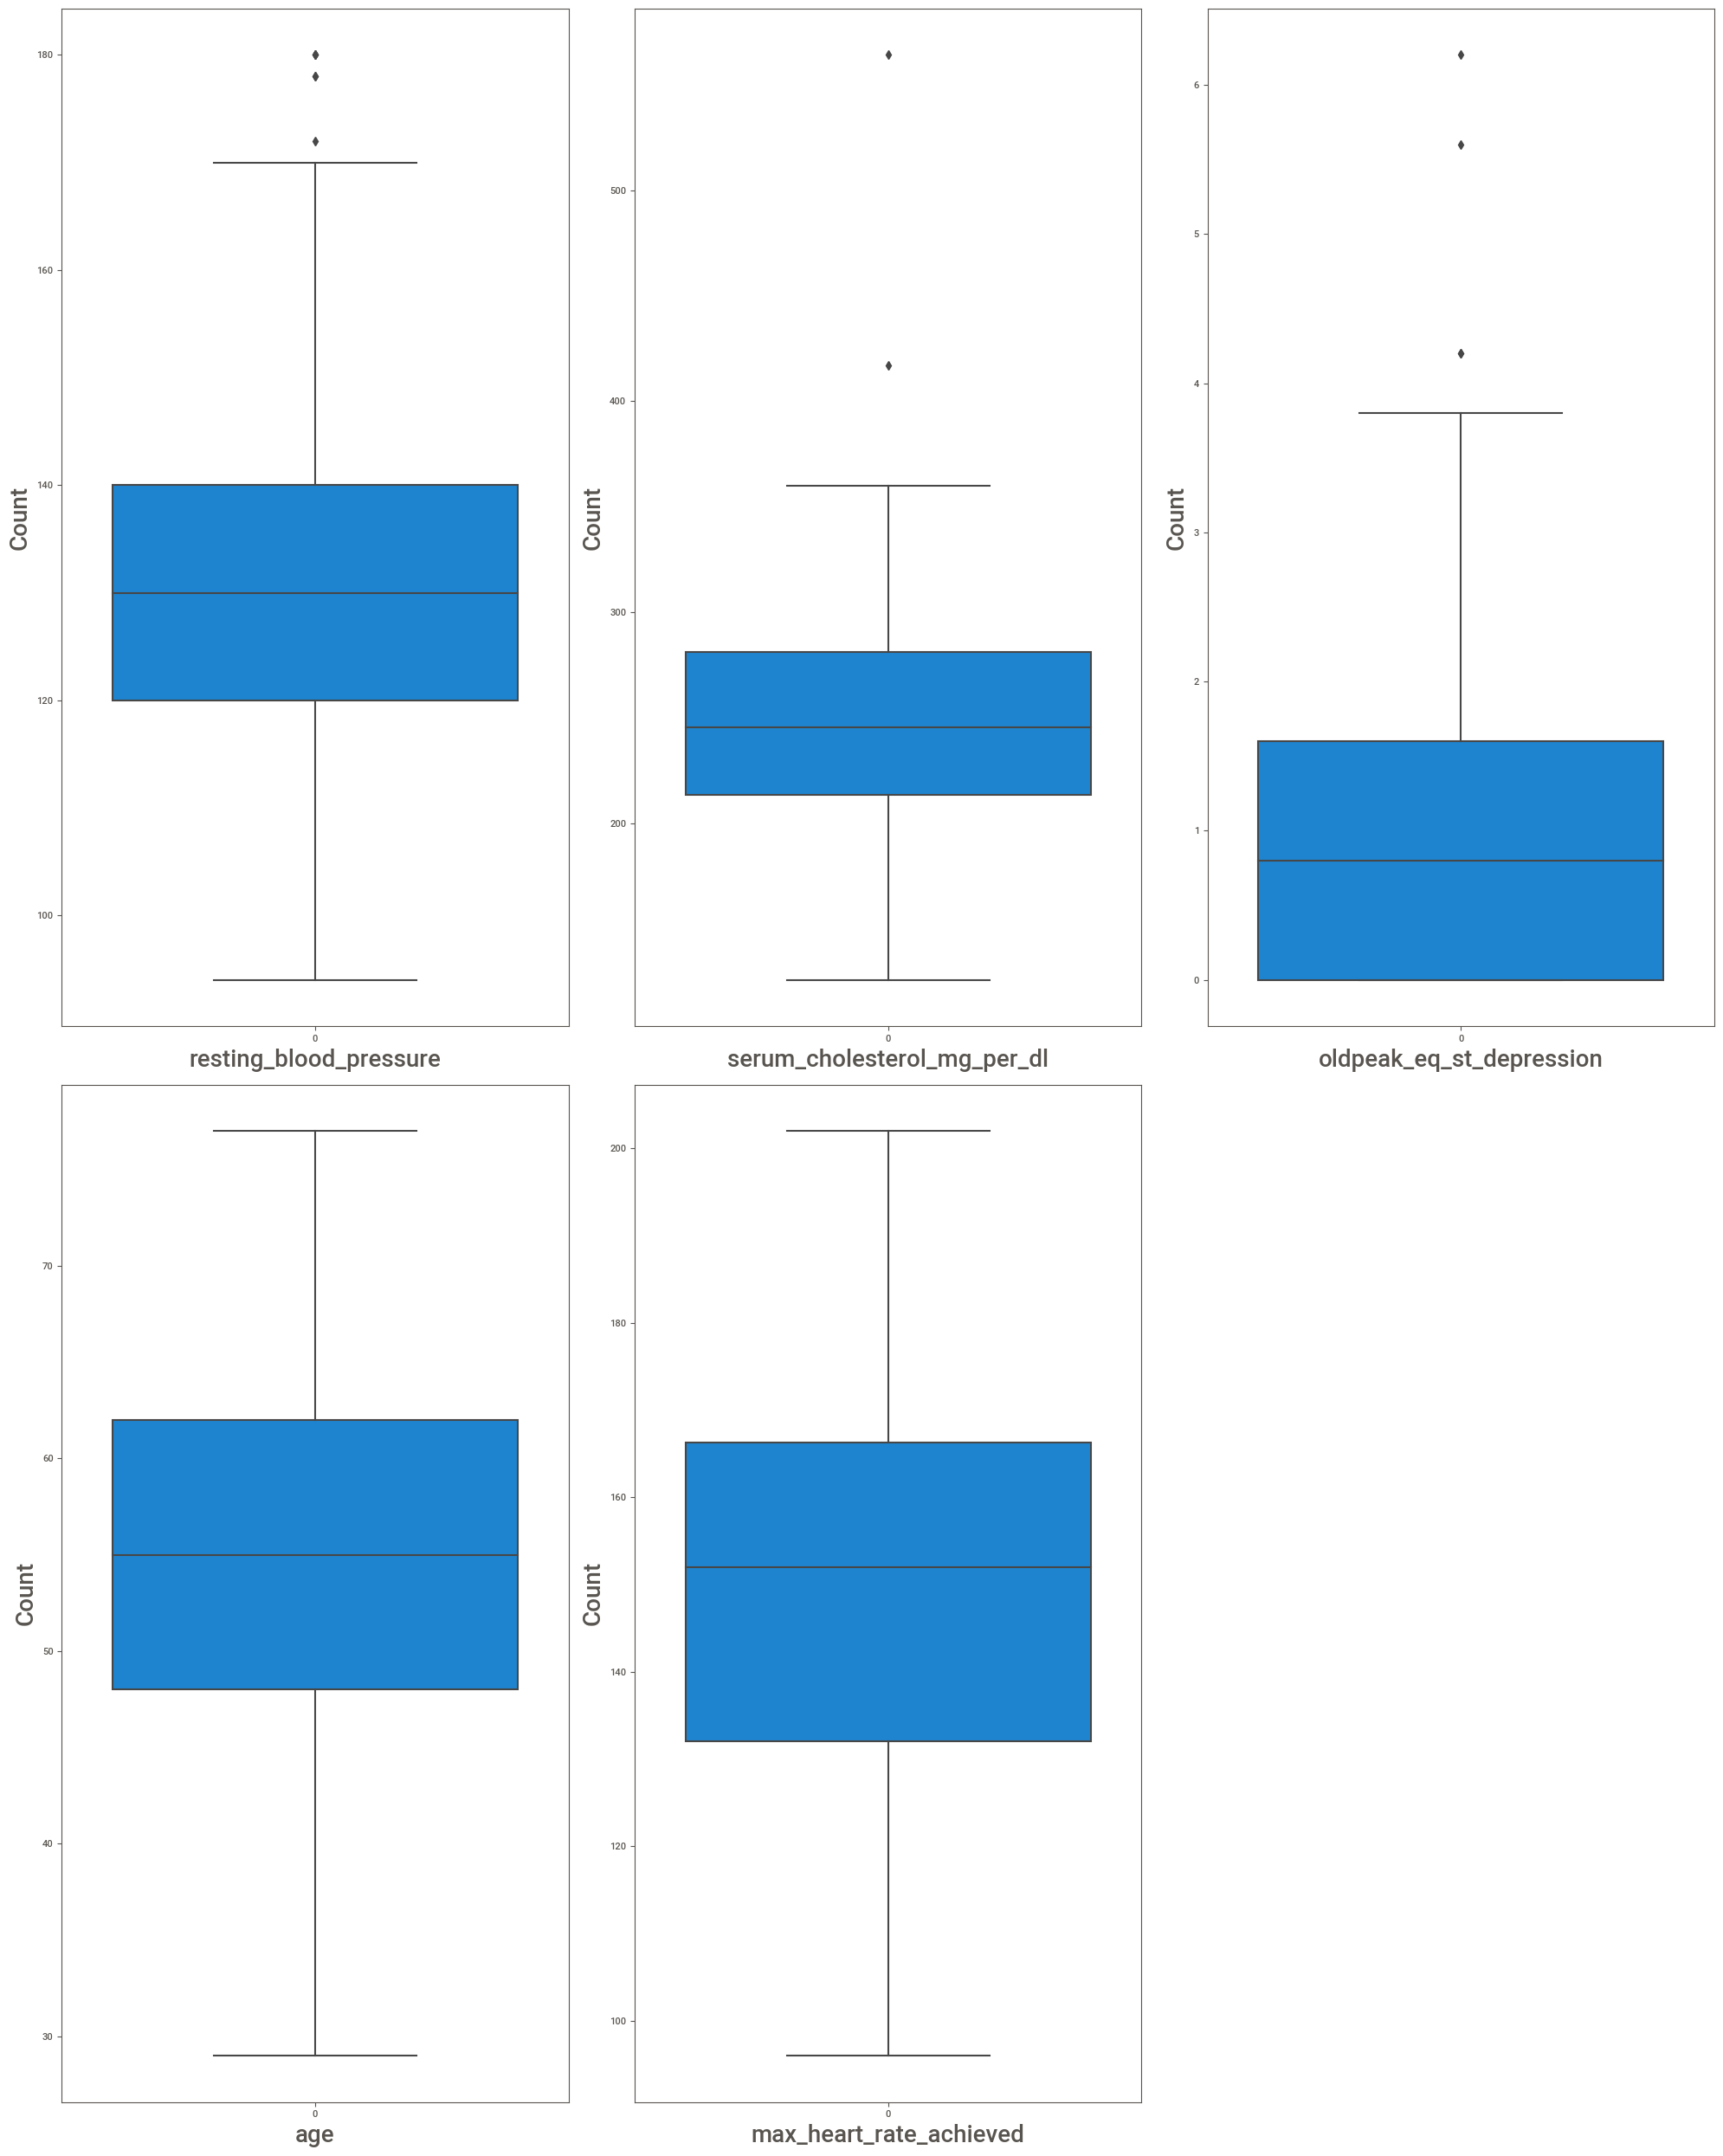

In [25]:
## Step 4:-Checking the outliers in the numerical columns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [26]:
#replace outlier with median value
# data.loc[data['resting_blood_pressure'] > 170,'resting_blood_pressure'] = np.median(data['resting_blood_pressure'])
# no replacement done has there is a possibility to have these values .this is a medical case

####  Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['patient_id','heart_disease_present']
data3=sc.fit_transform(data.drop(dl,axis=1))

In [28]:
data4=pd.DataFrame(data3,columns= ['slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age','max_heart_rate_achieved','exercise_induced_angina'])
data4.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0.0,0.5,0.395349,0.333333,0.0,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0
1,0.5,0.5,0.186047,0.666667,0.0,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0
2,0.0,0.5,0.360465,1.000000,1.0,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0
3,0.0,1.0,0.674419,1.000000,0.0,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0
4,1.0,1.0,0.976744,0.000000,0.0,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0


In [29]:
final_df=pd.concat([data4,data[['patient_id','heart_disease_present']]],axis=1)
final_df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0.0,0.5,0.395349,0.333333,0.0,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0,0z64un,0
1,0.5,0.5,0.186047,0.666667,0.0,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0,ryoo3j,0
2,0.0,0.5,0.360465,1.000000,1.0,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0,yt1s1x,1
3,0.0,1.0,0.674419,1.000000,0.0,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0,l2xjde,1
4,1.0,1.0,0.976744,0.000000,0.0,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0,oyt4ek,0


In [30]:
## checking the duplicate rows

#data.duplicate()
final_df.duplicated().sum()

0

In [31]:
## Saving the preprocessed data.
final_df.to_csv('Pre-processed_data.csv')

In [32]:
## Loading the data
df=pd.read_csv('Pre-processed_data.csv')

In [33]:
df

,Unnamed: 0,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0,0.0,0.5,0.395349,0.333333,0.000000,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0,0z64un,0
1,1,0.5,0.5,0.186047,0.666667,0.000000,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0,ryoo3j,0
2,2,0.0,0.5,0.360465,1.000000,1.000000,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0,yt1s1x,1
3,3,0.0,1.0,0.674419,1.000000,0.000000,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0,l2xjde,1
4,4,1.0,1.0,0.976744,0.000000,0.000000,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0,oyt4ek,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,0.5,1.0,0.360465,1.000000,0.666667,1.0,0.0,0.292237,0.032258,1.0,0.791667,0.632075,0.0,5qfar3,1
176,176,0.5,0.5,1.000000,1.000000,0.000000,0.0,0.5,0.458904,0.548387,0.0,0.541667,0.198113,1.0,2s2b1f,1
177,177,0.5,1.0,0.360465,0.666667,0.000000,0.0,0.0,0.417808,0.290323,1.0,0.729167,0.330189,1.0,nsd00i,1
178,178,0.0,0.5,0.348837,0.666667,0.666667,1.0,0.0,0.294521,0.000000,1.0,0.395833,0.745283,0.0,0xw93k,0


### Feature Selection

In [34]:
## No redundant fetaures
#We can drop patient_id.  
l1=['Unnamed: 0','patient_id']
df.drop(l1,axis=1,inplace=True)

In [35]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,0.5,0.395349,0.333333,0.000000,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0,0
1,0.5,0.5,0.186047,0.666667,0.000000,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0,0
2,0.0,0.5,0.360465,1.000000,1.000000,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0,1
3,0.0,1.0,0.674419,1.000000,0.000000,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0,1
4,1.0,1.0,0.976744,0.000000,0.000000,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1.0,0.360465,1.000000,0.666667,1.0,0.0,0.292237,0.032258,1.0,0.791667,0.632075,0.0,1
176,0.5,0.5,1.000000,1.000000,0.000000,0.0,0.5,0.458904,0.548387,0.0,0.541667,0.198113,1.0,1
177,0.5,1.0,0.360465,0.666667,0.000000,0.0,0.0,0.417808,0.290323,1.0,0.729167,0.330189,1.0,1
178,0.0,0.5,0.348837,0.666667,0.666667,1.0,0.0,0.294521,0.000000,1.0,0.395833,0.745283,0.0,0


In [36]:
## checking correlation
corr_data=df[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age']]

<Axes: >

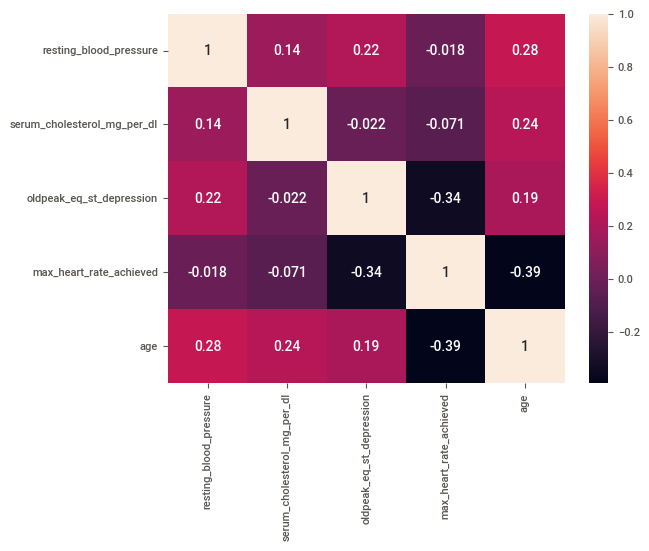

In [37]:
sns.heatmap(corr_data.corr(),annot=True)

## There is no relationship among the numerical data 

In [38]:
tc=df.corr()
tc

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.154101,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.006088,0.269583,0.174107,-0.070225,-0.052171,0.046448,0.251972,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_blood_pressure,0.098287,-0.006088,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.121207,0.269583,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.174107,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,-0.070225,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,-0.052171,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.046448,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak_eq_st_depression,0.615948,0.251972,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,0.265420,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421


<Axes: >

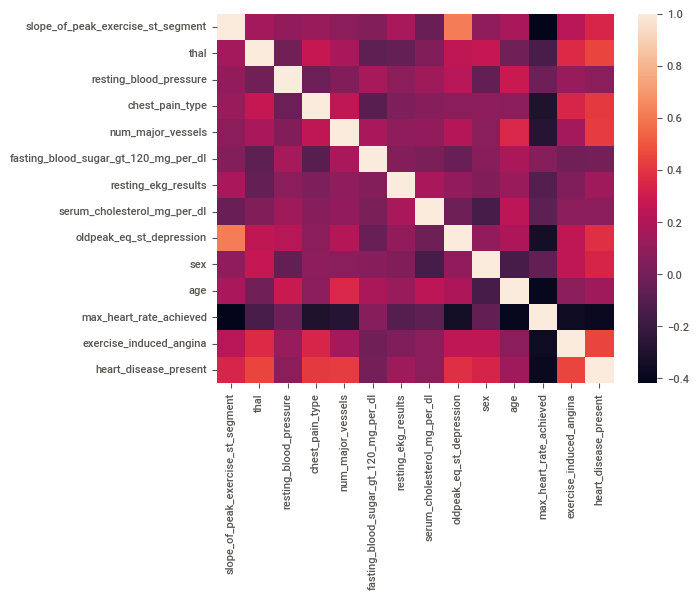

In [39]:
sns.heatmap(df.corr())

### Insights :
* There is a  good positive relationship between old peak eq st depression and slope of peak exercise segment
* There is a fair negative relationship between the max heart rate achieved and slope of peak exercise segment
* There is also a fair negative relationship between the max heart rate achieved and exercise induced angina,chest pain type, number of blood vessels, old peak eq st depression , age and ultimately the presence of a heart disease
* There is a fair relationship between exercise induced angina and thal, chest pain type ,max heart rate and presence of a heart disease
* No relationship was found between Fasting blood Sugar and presence of a heart disease,Fasting blood sugar and exercise induced angin and sex and Fasting blood sugar

In [40]:
df.describe() ## no constant features

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.275000,0.683333,0.433850,0.718519,0.231481,0.161111,0.525000,0.281304,0.162903,0.688889,0.537731,0.504560,0.316667,0.444444
std,0.309419,0.284124,0.197796,0.312818,0.323116,0.368659,0.499371,0.120361,0.180864,0.464239,0.194474,0.208146,0.466474,0.498290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.302326,0.666667,0.000000,0.000000,0.000000,0.200342,0.000000,0.000000,0.395833,0.339623,0.000000,0.000000
50%,0.000000,0.500000,0.418605,0.666667,0.000000,0.000000,1.000000,0.272831,0.129032,1.000000,0.541667,0.528302,0.000000,0.000000
75%,0.500000,1.000000,0.534884,1.000000,0.333333,0.000000,1.000000,0.354452,0.258065,1.000000,0.687500,0.662736,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Creation

In [41]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,0.5,0.395349,0.333333,0.000000,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0,0
1,0.5,0.5,0.186047,0.666667,0.000000,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0,0
2,0.0,0.5,0.360465,1.000000,1.000000,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0,1
3,0.0,1.0,0.674419,1.000000,0.000000,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0,1
4,1.0,1.0,0.976744,0.000000,0.000000,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1.0,0.360465,1.000000,0.666667,1.0,0.0,0.292237,0.032258,1.0,0.791667,0.632075,0.0,1
176,0.5,0.5,1.000000,1.000000,0.000000,0.0,0.5,0.458904,0.548387,0.0,0.541667,0.198113,1.0,1
177,0.5,1.0,0.360465,0.666667,0.000000,0.0,0.0,0.417808,0.290323,1.0,0.729167,0.330189,1.0,1
178,0.0,0.5,0.348837,0.666667,0.666667,1.0,0.0,0.294521,0.000000,1.0,0.395833,0.745283,0.0,0


In [42]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [43]:
## defining X and y
X=df.loc[:,['slope_of_peak_exercise_st_segment','thal','resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved','exercise_induced_angina']]




y=df.heart_disease_present

In [44]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0.0,0.5,0.395349,0.333333,0.000000,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0
1,0.5,0.5,0.186047,0.666667,0.000000,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0
2,0.0,0.5,0.360465,1.000000,1.000000,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0
3,0.0,1.0,0.674419,1.000000,0.000000,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0
4,1.0,1.0,0.976744,0.000000,0.000000,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1.0,0.360465,1.000000,0.666667,1.0,0.0,0.292237,0.032258,1.0,0.791667,0.632075,0.0
176,0.5,0.5,1.000000,1.000000,0.000000,0.0,0.5,0.458904,0.548387,0.0,0.541667,0.198113,1.0
177,0.5,1.0,0.360465,0.666667,0.000000,0.0,0.0,0.417808,0.290323,1.0,0.729167,0.330189,1.0
178,0.0,0.5,0.348837,0.666667,0.666667,1.0,0.0,0.294521,0.000000,1.0,0.395833,0.745283,0.0


In [45]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

## Model Selection
### Spliting the dataset into train and test

In [46]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=10)

In [47]:
## balancing the data
df.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

## Task 2- Create a model predicting potential Heart Disease in people using Machcine Learning Algorithm

  #### we are using four different algorithms. They are Support Vector Machine, Logistic Regression, Random Forest and XGBoost

## 1. Support Vector Machine Algorithm

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [49]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [50]:
from collections import Counter

print("Actual Classes",Counter(y_train))


print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 72, 1: 63})
SMOTE Classes Counter({1: 72, 0: 72})


In [51]:
X_smote.shape

(144, 13)

In [52]:
y_smote.shape

(144,)

In [53]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [54]:
# Predict output for X_test
y_hat=svclassifier.predict(X_test)

In [55]:
y_hat #predicted output data

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1], dtype=int64)

In [56]:
y_test  #Original output data

150    0
87     1
68     0
151    0
120    1
72     0
60     0
10     0
138    0
109    1
49     0
20     0
78     1
59     1
67     0
116    0
55     0
47     0
19     1
101    0
121    0
1      0
144    1
70     0
52     1
69     1
83     1
97     0
76     0
56     1
111    0
129    1
114    0
174    0
170    1
7      1
26     0
39     1
179    0
46     0
61     1
24     0
58     0
128    1
21     0
Name: heart_disease_present, dtype: int64

### EVALUATION OF MODEL

In [57]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
print("Accuracy for SVM:",acc)

Accuracy for SVM: 0.8888888888888888


In [58]:
print("Classification Report for SVM:")
print(classification_report(y_test,y_hat))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45



In [59]:
#confusion matrix
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
heart_disease_present,,
0,25,3
1,2,15


In [60]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8571428571428571

## Cross validation Techniques for SVM

In [61]:
## checking cross validation score to check the avg performance of our model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=10,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.71428571 0.71428571 0.82352941 0.93333333 0.93333333 1.
 0.82352941 0.625      0.75       0.82352941]
Cross validation Score: 0.8140826330532214
Std : 0.11092886334198074


In [62]:
scores.mean()

0.8140826330532214

In [63]:
scores.std()

0.11092886334198074

In [64]:
from sklearn.model_selection import StratifiedKFold
sk_fold = StratifiedKFold(n_splits=10,shuffle=True,random_state=34)
scores = cross_val_score(svclassifier,X,y,cv=sk_fold,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.71428571 0.73684211 0.66666667 0.75       0.77777778 0.85714286
 0.85714286 0.93333333 0.875      0.8       ]
Cross validation Score: 0.7968191311612365
Std : 0.07870176245698277


### SVM model is not good for this data as standard deviation is more than 0.05

### Hyperparameter Tuning for SVM 

In [65]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.

[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=1

[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=

[CV] END ................C=70, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=7

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [66]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

{'C': 60, 'gamma': 0.1, 'random_state': 1}


In [67]:
# clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=5, gamma=0.1,random_state=1) ##0.1

In [68]:
clf.fit(X_smote, y_smote)

SVC(C=5, gamma=0.1, random_state=1)

In [69]:
clf.score(X_smote, y_smote)

0.8472222222222222

In [70]:
y_clf=clf.predict(X_test)

In [71]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.82      0.82      0.82        17

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45



In [72]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
heart_disease_present,,
0,25,3
1,3,14


In [73]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.73913043 0.86792453 0.73684211]
Cross validation Score: 0.7812990227825511
Std : 0.07870176245698277


### Evenafter Hyperparameter tuning, Standard Deviation is high

## 2. Logistic Regression Algorithm

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred_lgr=lgr.predict(X_test)
y_pred_lgr

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1], dtype=int64)

In [76]:
print("Accuracy Score for logistic regression")
print(accuracy_score(y_test,y_pred_lgr))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test,y_pred_lgr))

Accuracy Score for logistic regression
0.8666666666666667
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.82      0.82      0.82        17

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45



In [77]:
print("intercept:",lgr.intercept_)
print("coefficent:",lgr.coef_)

intercept: [-4.23690395]
coefficent: [[ 1.27813204  1.32376045  0.25297198  1.50900954  1.70534238 -0.29126709
   0.23872444  0.60622593  1.0133938   1.29910284  0.09210716 -0.72857894
   0.68183594]]


## 3. Random Forest Algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, max_depth=10,max_features=20, criterion = 'gini', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print("Accuracy:",accuracy_rf)
print("Classification Report for Randomforest:")
print(classification_report(y_test,y_pred_rf))



Accuracy: 0.8888888888888888
Classification Report for Randomforest:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.93      0.76      0.84        17

    accuracy                           0.89        45
   macro avg       0.90      0.86      0.88        45
weighted avg       0.89      0.89      0.89        45



## Cross Validation Techniques for Random Forest

In [80]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(classifier,X,y,cv=10)
print("Cross validation scores for Random Forest:")
print(cv_scores)
mean_cv_score= cv_scores.mean()
print("Mean cross-validation score:",mean_cv_score)

Cross validation scores for Random Forest:
[0.83333333 0.77777778 0.83333333 1.         0.94444444 0.83333333
 0.72222222 0.72222222 0.83333333 0.66666667]
Mean cross-validation score: 0.8166666666666667


## Hyper Parameter Tuning 

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[10,20,30,None]}
grid_search=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(X,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_features=20,
                                              n_estimators=20,
                                              random_state=42),
             param_grid={'max_depth': [10, 20, 30, None]}, scoring='accuracy')

In [82]:
best_params=grid_search.best_params_
best_score=grid_search.best_score_
best_classifier=RandomForestClassifier(**best_params)
best_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [83]:
print("Best Score for training data:",best_score)
print("Best Parameters for training data:",best_params)

Best Score for training data: 0.7666666666666666
Best Parameters for training data: {'max_depth': 10}


In [84]:
#For Test data
grid_search.fit(X_test,y_test)
best_params1 =grid_search.best_params_
best_score1=grid_search.best_score_
best_classifier=RandomForestClassifier(**best_params1)
best_classifier.fit(X_test,y_test)

RandomForestClassifier(max_depth=10)

In [85]:
print("Best Score for test data:",best_score1)
print("Best Parameters for test data:",best_params1)

Best Score for test data: 0.7555555555555555
Best Parameters for test data: {'max_depth': 10}


In [86]:
y_pred1=best_classifier.predict(X_test)
print("Classification Report after tuning:")
print(classification_report(y_test,y_pred1))

Classification Report after tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 4. Gradient Boosting Algorithm

In [87]:
import xgboost as xgb
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=200,max_depth=6,learning_rate=0.1)

In [88]:
model_xgb.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric="error",early_stopping_rounds=200,verbose=25)

[0]	validation_0-error:0.17778
[25]	validation_0-error:0.13333
[50]	validation_0-error:0.15556


C:\Users\Pranav Kumar\new_anaconda\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Pranav Kumar\new_anaconda\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[75]	validation_0-error:0.15556
[100]	validation_0-error:0.15556
[125]	validation_0-error:0.20000
[150]	validation_0-error:0.22222
[175]	validation_0-error:0.22222
[199]	validation_0-error:0.22222


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred_xgb=model_xgb.predict(X_test)
print("Accuracy for XGBoost:")
print(accuracy_score(y_test,y_pred_xgb))

Accuracy for XGBoost:
0.8888888888888888


In [90]:
print("Classification report for xgboost:")
print(classification_report(y_test,y_pred_xgb))

Classification report for xgboost:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45



## 5. K-Nearest Neighbour(KNN) classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
y_pred_knn=knn.predict(X_test)
print("Accuracy score for KNN:",accuracy_score(y_test,y_pred_knn))
pd.crosstab(y_test,y_pred_knn)

Accuracy score for KNN: 0.9333333333333333


col_0,0,1
heart_disease_present,,
0,27,1
1,2,15


In [93]:
print("The classification report for KNN:")
print(classification_report(y_test,y_pred_knn))

The classification report for KNN:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



## 6. Decision Tree algorithm

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X,y)
y_pred_dtc=dtc.predict(X_test)
print("Accuracy for Decision Tree:",accuracy_score(y_test,y_pred_dtc))
pd.crosstab(y_test,y_pred_dtc)

Accuracy for Decision Tree: 1.0


col_0,0,1
heart_disease_present,,
0,28,0
1,0,17


In [95]:
print("Classification Report for Decision tree:")
print(classification_report(y_test,y_pred_dtc))

Classification Report for Decision tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Hyper parameter tuning for Decision Tree

In [96]:
#Grid search cv
grid_dtc= GridSearchCV(dtc, param_grid, cv=5)
grid_dtc.fit(X_train, y_train)
print("Best Parameters:", grid_dtc.best_params_)
acc_dtc1 = grid_dtc.score(X_test, y_test)
print(" Accuracy for DecisionTree after tuning:", acc_dtc1)

Best Parameters: {'max_depth': 20}
 Accuracy for DecisionTree after tuning: 0.8666666666666667


## Model Comparison report for given Heart disease prediction data

In [97]:
final_met={'Algorithm':['Logistic regression','Support Vector','Random Forest','XGBoost','KNN','DecisionTree'],
           'Accuracy':[0.86,0.88,0.88,0.88,0.93,1.0],
          'Precision':[0.82,0.83,0.93,0.83,0.94,1.0],
          'Recall':[0.82,0.88,0.76,0.88,0.88,1.0],
          'F1score':[0.82,0.86,0.84,0.86,0.91,1.0]}

In [98]:
result=pd.DataFrame(final_met)
result.set_index('Algorithm',inplace=False)
print ("Model comparison")
print(result)


Model comparison
             Algorithm  Accuracy  Precision  Recall  F1score
0  Logistic regression      0.86       0.82    0.82     0.82
1       Support Vector      0.88       0.83    0.88     0.86
2        Random Forest      0.88       0.93    0.76     0.84
3              XGBoost      0.88       0.83    0.88     0.86
4                  KNN      0.93       0.94    0.88     0.91
5         DecisionTree      1.00       1.00    1.00     1.00


## Conclusion

   In this study,we explored the performance of six different machine learning Algorithms- Logistic Regression, Support Vector machine,Random Forest,XGBoost,KNN,Decision Tree - for the task of heart disease Prediction.
  * Performance comparison:
      * Decision Tree model achieved highest accuracy of 1.0 indicating perfect classification on dataset.However,the result may suggest potential overfitting.After Hyper parameter tuning, accuracy drops to 0.75.
      * The KNN model achieved the highest precision after decision Tree, indicating that it correctly identified a high percentage of true positive instances.
       * While all other algorithm have similar accuracy(0.86-0.88) logistic Regression exhibits balanced Precision,recall,f1 score at 0.82. 
        * SVM showed high Precision but slightly lower recall and f1score. 
        * Random Forest achieved the precision of 0.93 but had lower recall. After Hyperparameter tuning in Random forest,we achieve perfect score(1.0) for all metrices in a classification report. It raises concerns about potential overfitting of data,leading to inflated expectations of model performance in real world scenarios.
        * XGBoost demonstrated consistent performance comparable to logistic Regression. 
        
   ### Among the algorithms evaluated, each demonstrated strengths and weaknesses. K-nearest neighbors (KNN) and Decision Tree exhibited competitive performance, while Random Forest and XGBoost showed promise with high accuracy. Logistic Regression and Support Vector Machine (SVM) performed reasonably well but had slightly lower accuracy.

### Task 3 - Suggestions to the hospital to awake the predictions of heart diseases prevents life threats

* As we see strong positive correlations between "chest_pain_type," "num_major_vessels," "exercise_induced_angina," and "heart_disease_present," indicating that these features are positively associated with the presence of heart disease.

* Risk stratification: Using the model to identify individuals at high risk of heart disease who might benefit from early intervention.
* Utilize predictive models to identify high-risk individuals based on key risk factors. Implement targeted screening programs to detect early signs of heart disease and initiate preventive interventions tailored to individual patient profiles.
* Educate patients on the importance of lifestyle modifications, including maintaining healthy cholesterol levels, blood pressure control, regular exercise, and dietary changes. Empower patients to take proactive steps towards heart health through personalized interventions and support programs.

 ## Challenges Faced
 
* Since the dataset is small, selecting informative features and engineering features becomes challenging.
* Small datasets maynot support complex models with a large number of parameters, hence we face overfiiting issue in RandomForest Algorithm and Decision Tree Algorithms.
* It raises concerns about models may not generalize well to unseen data or different populations in real world scenarios.
* The validation by domain experts,such as Cardiologists or Medical professionals is essential to ensure the model's accuracy and usefulness in clinical practice.
